In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)




In [8]:
# We can view all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [12]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
results = session.query(Measurement.prcp)
session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23')

In [14]:
Date1 = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

In [15]:
print (Date1)

('2017-08-23',)


In [16]:
# Calculate the date 1 year ago from the last data point in the database
Date2 = dt.date(2017,8,23) - dt.timedelta(days=365)
print(Date2)


2016-08-23


In [17]:
# Perform a query to retrieve the data and precipitation scores
Yr16_17 = session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date >= '2016-08-24', Measurement.date <= '2017-08-23').\
        order_by(Measurement.date).all()
Yr16_17

-11', 0.3),
 ('2016-09-11', 0.6),
 ('2016-09-12', 0.0),
 ('2016-09-12', 0.04),
 ('2016-09-12', None),
 ('2016-09-12', None),
 ('2016-09-12', 0.15),
 ('2016-09-12', 0.31),
 ('2016-09-12', 1.04),
 ('2016-09-13', 0.02),
 ('2016-09-13', 0.37),
 ('2016-09-13', 0.32),
 ('2016-09-13', None),
 ('2016-09-13', 0.46),
 ('2016-09-13', 0.34),
 ('2016-09-13', 1.2),
 ('2016-09-14', 1.32),
 ('2016-09-14', 0.9),
 ('2016-09-14', 1.84),
 ('2016-09-14', None),
 ('2016-09-14', 1.19),
 ('2016-09-14', 2.33),
 ('2016-09-14', 6.7),
 ('2016-09-15', 0.42),
 ('2016-09-15', 0.12),
 ('2016-09-15', 0.07),
 ('2016-09-15', None),
 ('2016-09-15', 0.17),
 ('2016-09-15', 0.83),
 ('2016-09-15', 3.35),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.07),
 ('2016-09-16', 0.0),
 ('2016-09-16', 0.01),
 ('2016-09-16', 0.06),
 ('2016-09-16', 0.61),
 ('2016-09-17', 0.05),
 ('2016-09-17', 0.04),
 ('2016-09-17', 0.0),
 ('2016-09-17', 0.36),
 ('2016-09-17', 0.23),
 ('2016-09-18', 0.0),
 ('2016-09-18', 0.0),
 ('2016-

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
Yr16_17_df=pd.DataFrame(data=Yr16_17)
Yr16_17_df.head(10)


,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


In [19]:
# Sort the dataframe by date
Yr16_17_df.sort_values(by=['date'])



,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
...,...,...
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00


<function matplotlib.pyplot.show(*args, **kw)>

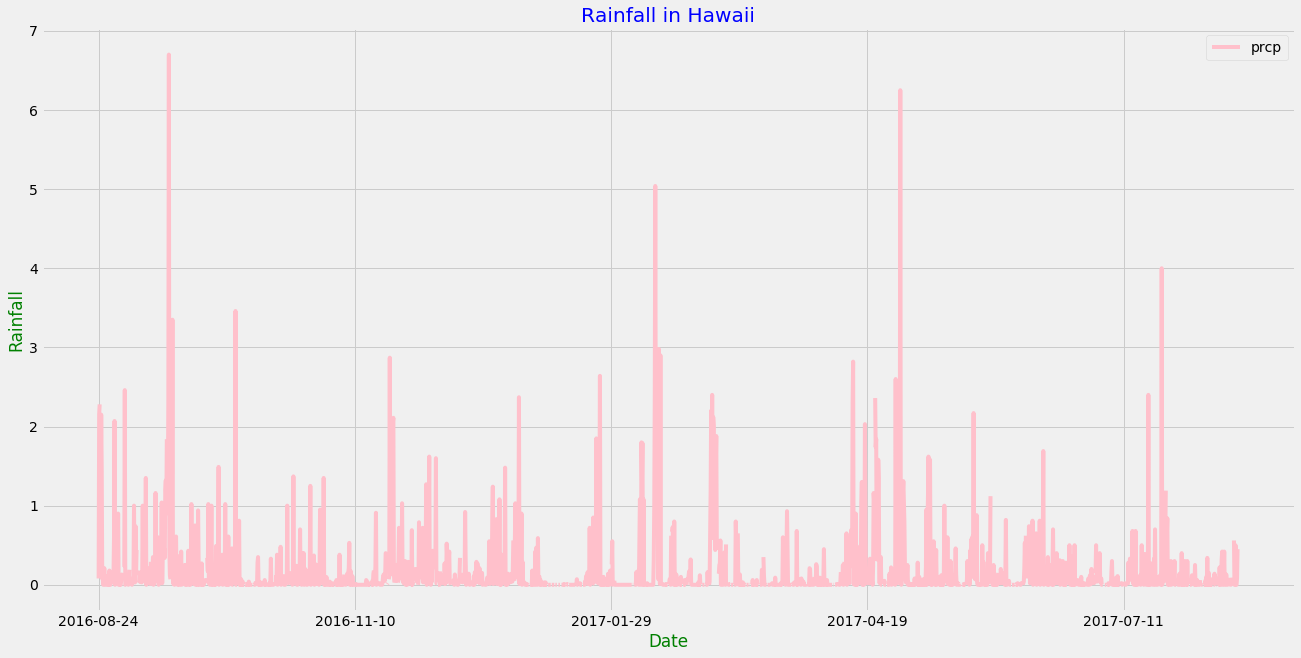

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
Yr16_17_df.plot(figsize = (20,10),kind='line', x="date", y="prcp", color='pink')
plt.title("Rainfall in Hawaii", color = 'blue') 
plt.xlabel('Date', color='green')
plt.ylabel('Rainfall',color='green')
plt.show

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Yr16_17_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [22]:
# Design a query to show how many stations are available in this dataset?
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [23]:
session.query(func.count(Station.station)).all()

[(9)]

In [26]:
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [27]:
#Which station has the highest number of observations?
# USC00519281

        


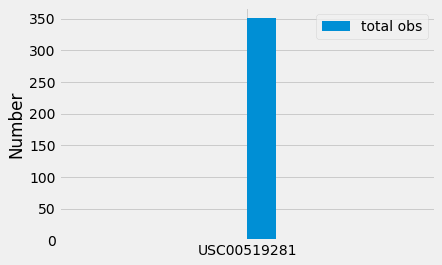

In [67]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
Histogram=session.query(Measurement.station,Measurement.date, Measurement.tobs).\
    filter (Measurement.station=='USC00519281').\
        filter(Measurement.date >= '2016-08-24', Measurement.date <= '2017-08-23').all()
        
x=[x[0]for x in Histogram]

plt.hist(x, bins=12)
plt.ylabel('Number')
plt.legend(['total obs'])
plt.show() #plt.savefig(Images/Station-Histogram.png)



## Bonus Challenge Assignment